## kNN

#### Context
- [Problem 3](#pr_3)
- [Problem 4](#pr_4)
- [Problem 5](#pr_5)
- [Problem 6](#pr_6)


#### Resources:

**k-Nearest Neighbors**:
    - Chapter 1.4.1 - 1.4.3 (in Murphy, Machine Learning: A Probabilistic Perspective)
**for probabilistic k-NN**:
    - Chapter 14 Nearest Neighbour Classification (in Barber, Bayesian Reasoning and Machine Learning)
**Decision Trees**:  
    - Chapter 16.2 Classification and Regression Trees (CART) (in Murphy, Machine Learning: A Probabilistic Perspective)
    - or Chapter 14.4 Tree-based Models (in Bishop, Pattern Recognition and Machine Learning)
    - or Chapter 3 Classification and Regression Trees (in Gilles Louppe, Understanding Random Forests, https://github.com/glouppe/phd-thesis)

**Blog-posts**
- http://colah.github.io/posts/2015-09-Visual-Information/ 
- http://www.r2d3.us/visual-intro-to-machine-learning-part-1/ 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import mahalanobis, sqeuclidean
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter
%matplotlib inline

### Iris dataset

In [75]:
iris = datasets.load_iris()
X = iris.data[:, :4] 
y = iris.target

### HW dataset

In [2]:
data = pd.read_csv("../datasets/01_homework_dataset.csv")
X = np.array(data.loc[:, data.columns[:3]])
y = np.array(data.loc[:, data.columns[3]])
x_a = np.array([[4.1, 0.1, 2.2]])
x_b = np.array([[6.1, 0.4, 1.3]])

### Visualisation

Text(0.5, 0, 'Z Label')

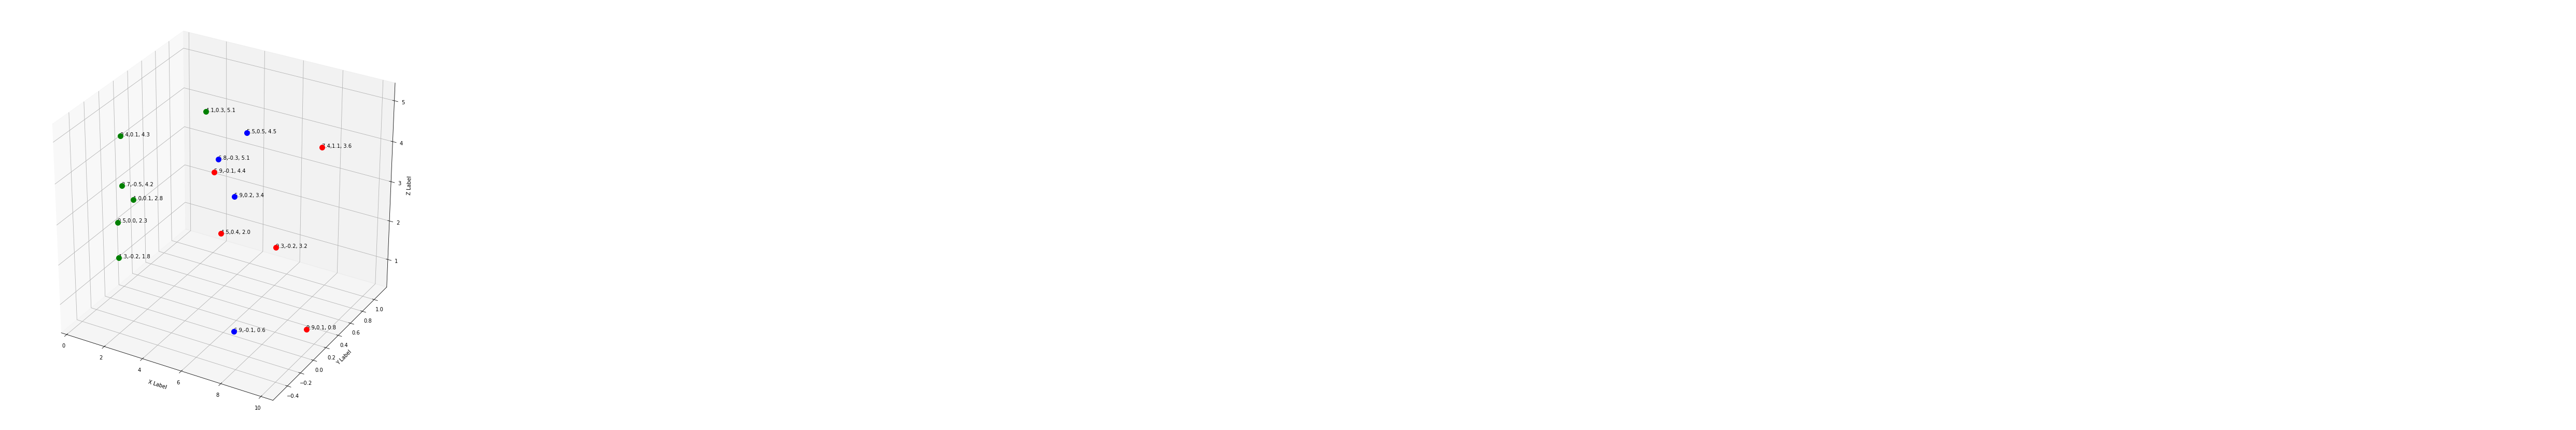

In [102]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

color = ["red", "green", "blue"]
for row, label in zip(X,y):
    ax.scatter3D(row[0], row[1], row[2], s=100, c=color[label], marker="o")
    ax.text(row[0], row[1], row[2], f"{row[0]},{row[1]}, {row[2]}", size=10, zorder=1)
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [3]:
class kNN:
    def __init__(self, k):
        self.k = k
    
    @staticmethod
    def squared_euclidean_dist(X_new, X):
        result = np.sum((X_new - X)**2, axis=1)
        return result
    
    @staticmethod
    def mahalanobis_dist(X_new, X):
        razn = X_new - X 
        c =  razn @ np.linalg.inv(np.cov(X.T))
        result = np.sqrt(np.sum(c * razn, axis=1))
        return result
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, X_new, d=None, verbose=False):
        y_predict = np.array([])
        for x_new in X_new:
            dissimilarity = d(x_new, self.X)
            n_asterisk = np.argsort(dissimilarity)[:self.k]
            counts = Counter(self.y[n_asterisk])
            y_predict = np.append(y_predict, max(counts, key=counts.get))
            if verbose:
                print(f"nearest elements", n_asterisk)
                print(f"Dissimilarity between new vector and existing points \n", dissimilarity[n_asterisk])
                print(f"Coordinates of {self.k} nearest points \n", self.X[n_asterisk])
                print(f"Labels of {self.k} nearest points \n", self.y[n_asterisk])
                print(f"Frequentcy of nearest labels \n", counts)
                print(f"Predicted value {max(counts, key=counts.get)}")
        return y_predict
    
    def predict_reg(self, X_new, d=None):
        y_predict = np.array([])
        for x_new in X_new:
            dissimilarity = d(x_new, self.X)
            n_asterisk = np.argsort(dissimilarity)[:self.k]
            y_predict = np.mean(y[n_asterisk])
        return y_predict

<a id="pr_3"></a>
### Problem 3

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [88]:
clf = kNN(3)
clf.fit(X_train, y_train)

In [90]:
y_predict_ed = clf.predict(X_test, d=kNN.squared_euclidean_dist)
y_predict_md = clf.predict(X_test, d=kNN.mahalanobis_dist)

print(f"Accuracy using euclidean metric {accuracy_score(y_test, y_predict_ed)*100}%")
print(f"Accuracy using mahalanobis metric {accuracy_score(y_test, y_predict_md)*100}%")

Accuracy using euclidean metric 94.73684210526315%
Accuracy using mahalanobis metric 86.8421052631579%


<a id="pr_4"></a>
### Problem 4

In [5]:
clf = kNN(3)
clf.fit(X, y)
print(clf.predict(x_a, d=kNN.squared_euclidean_dist))
print(clf.predict(x_b, d=kNN.squared_euclidean_dist))

[0.]
[2.]


<a id="pr_5"></a>
### Problem 5

In [104]:
print(clf.predict_reg(x_a, d=kNN.squared_euclidean_dist))
print(clf.predict_reg(x_b, d=kNN.squared_euclidean_dist))

1.0
1.3333333333333333


### Choose the best K

In [91]:
k_eval = []
for k in range(1, len(y_train)):
    clf = kNN(k)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test, d=kNN.squared_euclidean_dist)
    k_eval.append(accuracy_score(y_test, y_predict))

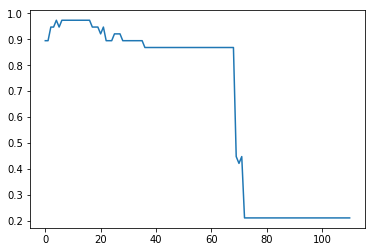

In [92]:
plt.plot(np.arange(len(y_train)-1), k_eval)
plt.show()

### Sklearn implementation

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
clf = KNeighborsClassifier(3, metric=sqeuclidean)

In [107]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30,
           metric=<function sqeuclidean at 0x7f879ada7268>,
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [108]:
y_predict = clf.predict(X_test)
print(f"Accuracy {accuracy_score(y_test, y_predict)*100}%")

Accuracy 94.73684210526315%


### Probabilistic k-NN:
Chapter 14 Nearest Neighbour Classification (in Barber, Bayesian Reasoning and Machine Learning)

![](../images/Selection_053.jpg)
![](../images/Selection_054.jpg)
![](../images/Selection_055.jpg)
![](../images/Selection_057.jpg)

<a id="pr_6"></a>
### Problem 6

For a novel input **x** that is far from all training points, Nearest Neighbours, and its soft probabilistic
variant will confidently classify **x** as belonging to the class of the nearest training point. This is arguably
opposite to what we would like, namely that the classification should tend to the prior probabilities of the
class based on the number of training data per class. A way to avoid this problem is, for each class, to
include a fictitious mixture component at the mean of all the data with large variance, equal for each class.
For novel inputs close to the training data, this extra fictitious datapoint will have no appreciable effect.
However, as we move away from the high density regions of the training data, this additional fictitious
component will dominate. Since the distance from **x** to each fictitious class point is the same, in the limit
that **x** is far from the training data, the effect is that no class information from the position of **x** occurs.

### Implementation using PyTorch 

In [103]:
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.distributions.normal import Normal

In [157]:
class TrainDataset(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)
        self.X = self.data.loc[:, self.data.columns[:3]]
        self.y = self.data.loc[:, self.data.columns[3]]
    
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, idx):
        try:
            item = self.data.iloc[idx]
            return item
        except BaseException:
            print(f"data contains only {self.__len__()} elemenst")
            
class ValidDataset(Dataset):
    def __init__(self, train_dataset, size=10):
        self.X = pd.DataFrame(0, index=np.arange(size), columns=train_dataset.X.columns)
        for indx in range(train_dataset.X.shape[1]):
            mu, sigma = torch.mean(train_dataset.X.iloc[:, indx]), torch.std(train_dataset.X.iloc[:, indx])
            normal_dist = Normal(mu, sigma)
            self.X.iloc[:, indx] = normal_dist.sample_n(n=10)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        try:
            item = self.X.iloc[idx]
            return item
        except BaseException:
            print(f"data contains only {self.__len__()} elemenst")    

In [158]:
train_dataset = TrainDataset("../datasets/01_homework_dataset.csv")

In [27]:
valid_dataset = ValidDataset(train_dataset=train_dataset, size=10)